In [2]:
!geth --exec admin.peers attach http://localhost:8445

[{
    caps: ["eth/66", "eth/67", "eth/68", "snap/1"],
    enode: "enode://40582542366ffd97808c8e23d7a61b87ac39290ab7f4aea1aac857900e40bfdff421bdc28f8babad2d5ed47afb88f13d6cc2e672bb9eb438363a3da85b7fd948@51.195.142.252:30303",
    id: "552fd15b7dd7f9d201fef2179a1f216ba8c9e3787c5630a286595840129289e5",
    name: "Geth/v3.0.1-pulse-stable-db2c45dc/linux-amd64/go1.20.8",
    network: {
      inbound: false,
      localAddress: "172.17.109.196:57613",
      remoteAddress: "51.195.142.252:30303",
      static: false,
      trusted: false
    },
    protocols: {
      eth: "handshake",
      snap: "handshake"
    }
}]


In [3]:
%%writefile src/ethNet.js
console.log('peer count: ', net.peerCount);
console.log('net.listening: ', net.listening);

Writing src/ethNet.js


In [6]:
!geth --exec 'loadScript("src/ethNet.js")' attach http://localhost:8445

"loadScript(src/ethNet.js)"


In [7]:
%%writefile src/ethMinerEtherbase.js
console.log('Before: ', eth.coinbase);
miner.setEtherbase(eth.accounts[1]);
console.log('After: ', eth.coinbase);

Writing src/ethMinerEtherbase.js


In [1]:
! geth --jspath "src" --exec "loadScript('ethMinerEtherbase.js')" attach http://localhost:8445

Before:  0xf98c4e0e08992da6ca740c2d6fa3be52658eb8e1
After:  0x78e5663da8bead477963646ea2e86a6f75c2df01
null


In [2]:
import bitcoin

privKey = bitcoin.sha256('hello key')## 문자열이 개인키를 만들때 넣어주는 거 말하는 것
print(privKey)

3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b


In [3]:
import hashlib

x=hashlib.sha256("hello key".encode('utf-8')).hexdigest()
print(x)

3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b


In [4]:
pubKey = bitcoin.privtopub(privKey)
print(pubKey)

04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f


In [5]:
addr = bitcoin.pubtoaddr(pubKey)
print(addr)

1NthZ9kJVbtxrHQiocfjLLTcMH3F2DLcgD


In [6]:
text = "Hello Hash"

for nonce in range(10):
# add the nonce to the end of the text
    input = text + str(nonce) # adding nonce procudes totally different hashes.
    hash = hashlib.sha256(input.encode('utf-8')).hexdigest()
    print(input, '=>', hash)##거래가 잘못되면 기존의 hash에서 새로운 hash를 만들어야하는데 그럴때 추가해 주는 값이 nonce값을 추가해서 hash값을 만들어줌

Hello Hash0 => 34cc7b4455645fe634cd1ad246f2ae283bbade92d395cabf61608173764f0298
Hello Hash1 => 20401add4f7fc728525f94c4b0e6be9516366aa4dd5766b569228783ddf526d0
Hello Hash2 => 305b90d9b0bde189a842b9b55c9e6cba9c14f8188639544c4feea803b654cab9
Hello Hash3 => 646b759044fcd4b12eea7c7196bedf6701e83b27380c887d2d7fe91a661ba422
Hello Hash4 => 43025a967e5c0e0c1c92adb9361c970fa02ba889b37984f64179d057acef9d3d
Hello Hash5 => 1f03762cfdc85f8a1562d981c893e4f2b2517ef4e221f6f12c91e8f69cb43cfb
Hello Hash6 => e94dbbbb1dc0d918ab913de9509e1b47df2838fbbbf86fc2fcc9d8cd07535f8a
Hello Hash7 => 85948326329e468cfa25153c54e90f3d11ebbbc7775f8716ad256478b09a6747
Hello Hash8 => b7db3b7950c5af6eada985e7b1f88db39f3fbe25c95dc5fd3b96e6e9731b5446
Hello Hash9 => 4c5f5b60e2e7d3b6629f05fdfe691777cf1ac99b1793d9aa589cc0904b69610b


In [7]:
import bitcoin
privKey = bitcoin.sha256('hello key')
pubKey = bitcoin.privtopub(privKey)
addr = bitcoin.pubtoaddr(pubKey)
print("privKey: ", privKey)
print("pubKey: ", pubKey)
print("addr: ", addr)

privKey:  3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b
pubKey:  04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f
addr:  1NthZ9kJVbtxrHQiocfjLLTcMH3F2DLcgD


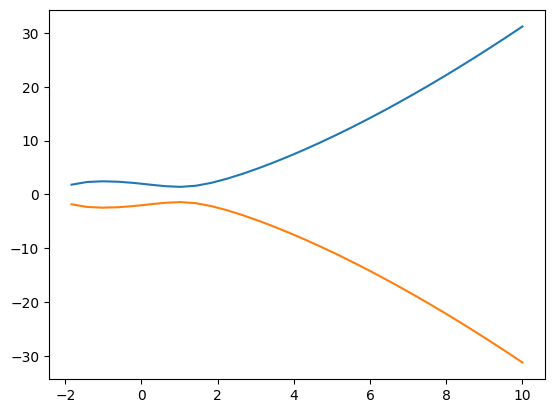

In [9]:
import numpy as np
import matplotlib.pylab as pl
def f(x):
   return x**3 -3*x + 4

xa = np.mgrid[-10:10:50j] # -10 ~ 10사이의 복소수 50개의 배열을 생성
y = list()
x = list()
for i in range(0,len(xa)):
   _x = xa.ravel()[i]     # 2차원을 1차원배열로 변환후 순서대로 선택
   _y=f(_x)
   if _y> 0:
       y.append(np.sqrt(_y))
       x.append(_x)

pl.plot(x, y, "-")
pl.plot(x, [-yi for yi in y], "-")
pl.show()

##x축으로 대칭이다